In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
course_information = pd.read_csv('course_information.csv')
course_posts = pd.read_csv('course_posts.csv')
course_threads = pd.read_csv('course_threads.csv')

In [3]:
course_information[:5]

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,392
2,Automata,automata-002,6,9,11/4/2013,NaN,Q,E,429,NaN,493
3,Big Data in Education,bigdata-edu-001,8,7,10/24/2013,NaN,?,E,585,NaN,710
4,Bioinformatics Algorithms (Part 1),bioinformatics-001,12,9,11/4/2013,1/27/2014,Q,E,1160,NaN,941


In [4]:
course_posts[:5]

,post_id,thread_id,course_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,3,2,analysenumerique-001,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,4,2,analysenumerique-001,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,7,2,analysenumerique-001,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,8,2,analysenumerique-001,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,15,2,analysenumerique-001,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


In [5]:
course_threads[:5]

,thread_id,course_id,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id
0,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13
1,3,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,572,0,13
2,4,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,196,0,13
3,7,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,135,0,13
4,8,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,188,0,13


In [6]:
course_information_new = course_information.sort_values('num_threads',ascending=False)

Text(0.5, 0, 'Course')

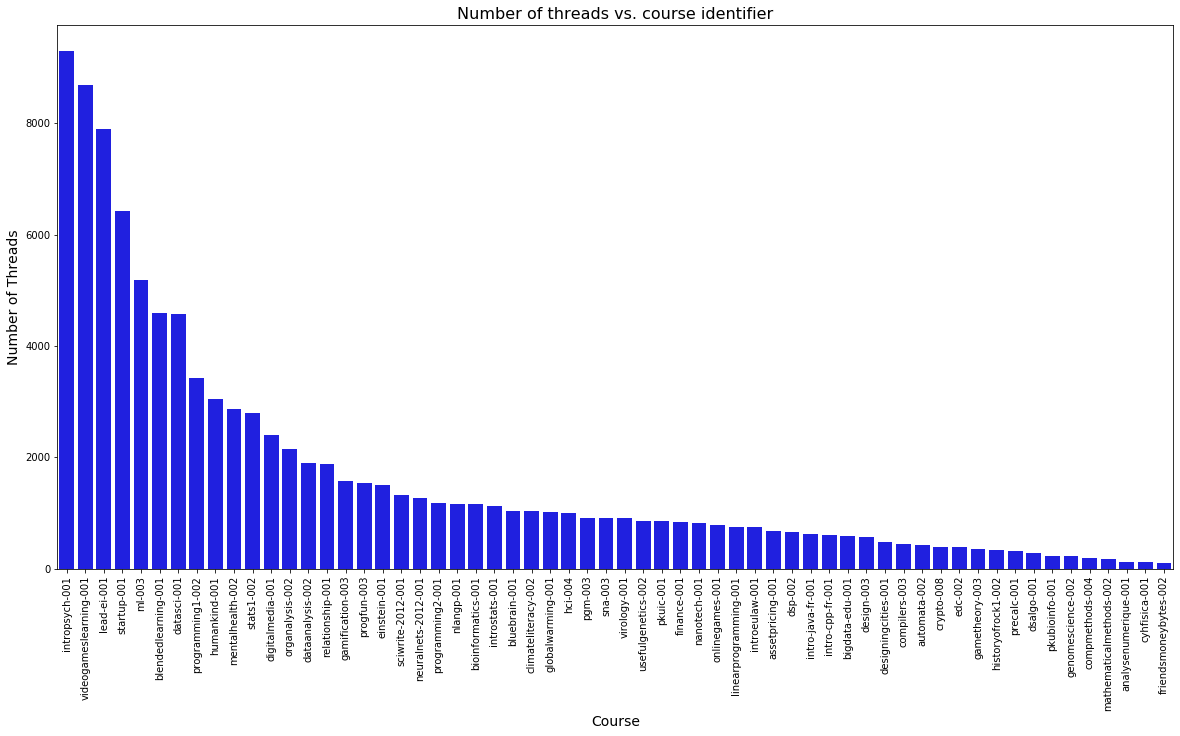

In [7]:

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x= 'course_id',y = 'num_threads', data = course_information_new, color = 'b',ax=ax)
plt.title("Number of threads vs. course identifier", size=16)
plt.xticks(rotation=90, horizontalalignment="center")
plt.ylabel("Number of Threads", size=14)
plt.xlabel("Course", size=14)

In [8]:
info_posts = pd.merge(course_information, course_posts, how='inner', on=['course_id'])
info_posts[:5]

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,...,thread_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


In [10]:
info_posts_fig2 = info_posts.groupby(['course_id','num_users'])['post_id'].count().to_frame().reset_index()
info_posts_fig2 = info_posts_fig2.sort_values('post_id',ascending=False)
info_posts_fig2[:5]

,course_id,num_users,post_id
35,lead-ei-001,10447,81373
55,startup-001,8592,45947
33,intropsych-001,11989,45776
29,humankind-001,4371,43968
39,ml-003,6368,39654


Text(0.5, 0, 'Thread Size(Number of Messages)')

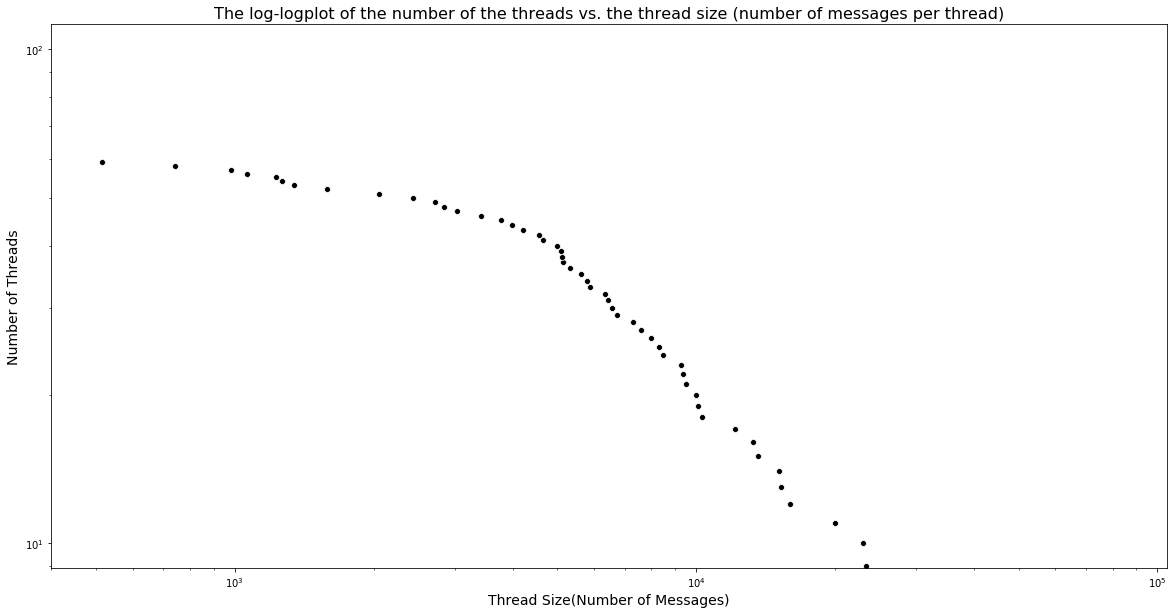

In [11]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="post_id", y="course_id",data=info_posts_fig2,color = 'black',ax=ax)
plt.yscale('log')
plt.xscale('log')
plt.title("The log-logplot of the number of the threads vs. the thread size (number of messages per thread)", size=16)
plt.ylabel("Number of Threads", size=14)
plt.xlabel("Thread Size(Number of Messages)", size=14)

Text(0.5, 0, 'Thread Size(Number of Messages)')

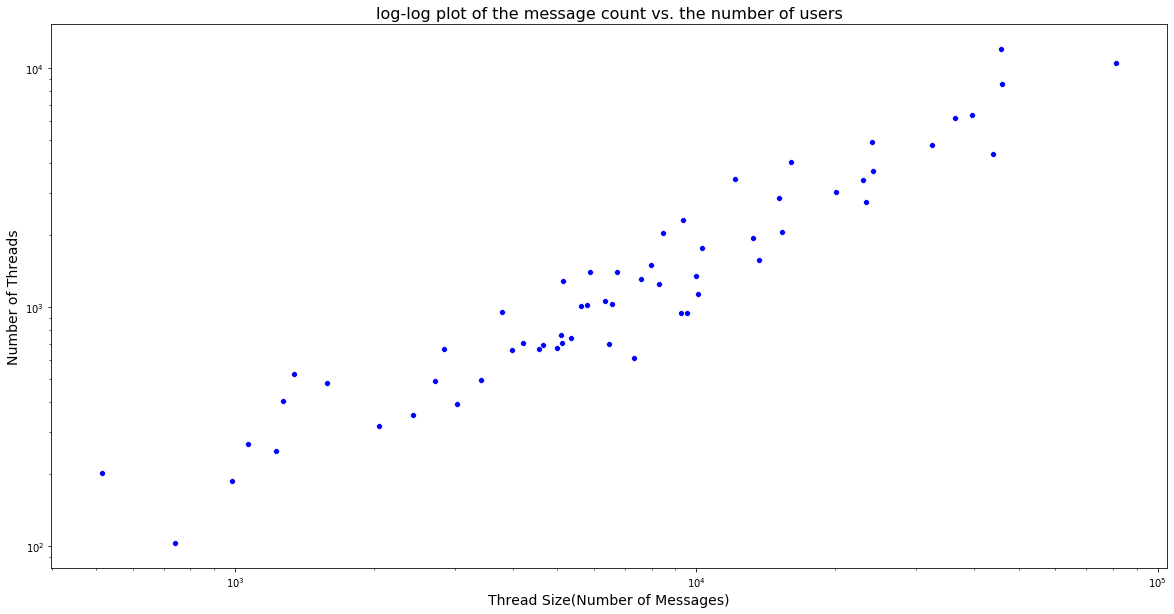

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="post_id", y="num_users",data=info_posts_fig2,color = 'b',ax=ax)
plt.yscale('log')
plt.xscale('log')
plt.title("log-log plot of the message count vs. the number of users", size=16)
plt.ylabel("Number of Threads", size=14)
plt.xlabel("Thread Size(Number of Messages)", size=14)

In [13]:
course_posts_new = course_posts.groupby('user_type')['post_id'].count().to_frame().reset_index()
course_posts_new = course_posts_new.sort_values('post_id',ascending=False)

Text(0.5, 0, 'Number of Threads')

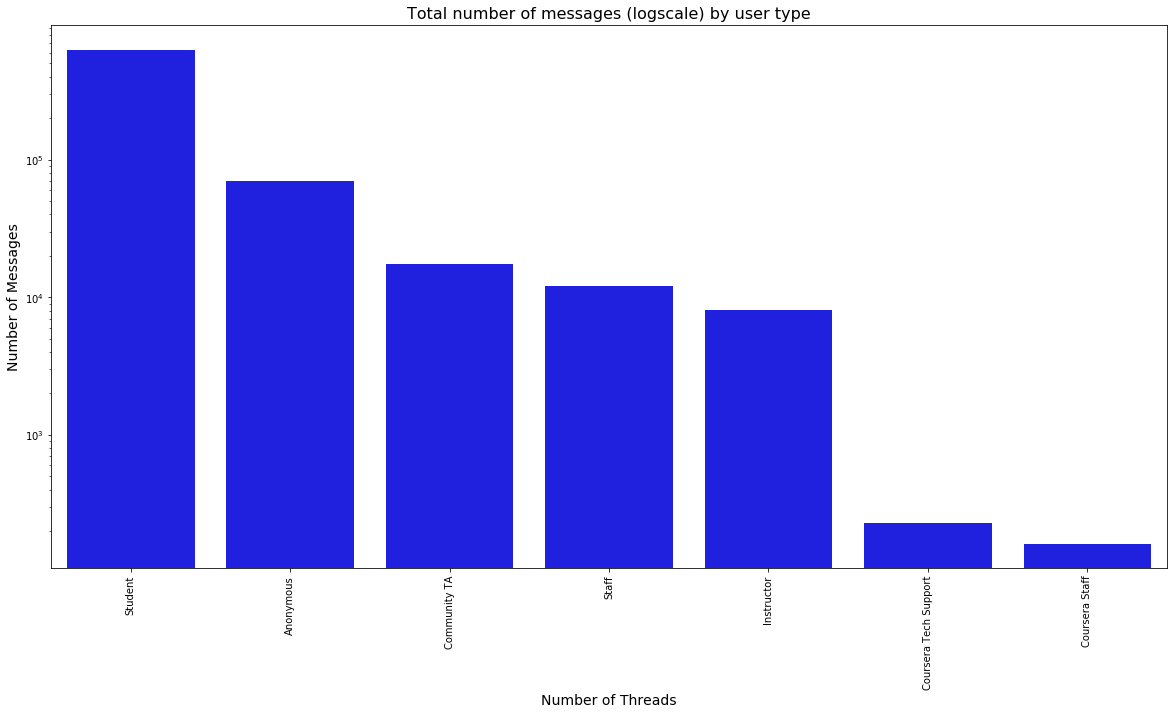

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x= 'user_type',y = 'post_id', data = course_posts_new, color = 'b',ax=ax)
plt.yscale('log')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Total number of messages (logscale) by user type", size=16)
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Number of Threads", size=14)

In [15]:
info_posts

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,...,thread_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13
5,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,6,7849522082,Student,1359246298,-0.348931,0,1,13
6,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,15,0,8489183117,Student,1359259908,-0.346431,-1,10,13
7,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,7,8489183117,Student,1359313313,-0.336619,-1,10,13
8,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,8,3992067770,Instructor,1360576987,-0.104463,0,15,13
9,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,9,3992067770,Instructor,1360597970,-0.100608,0,19,13


NameError: name 'sorted_result' is not defined

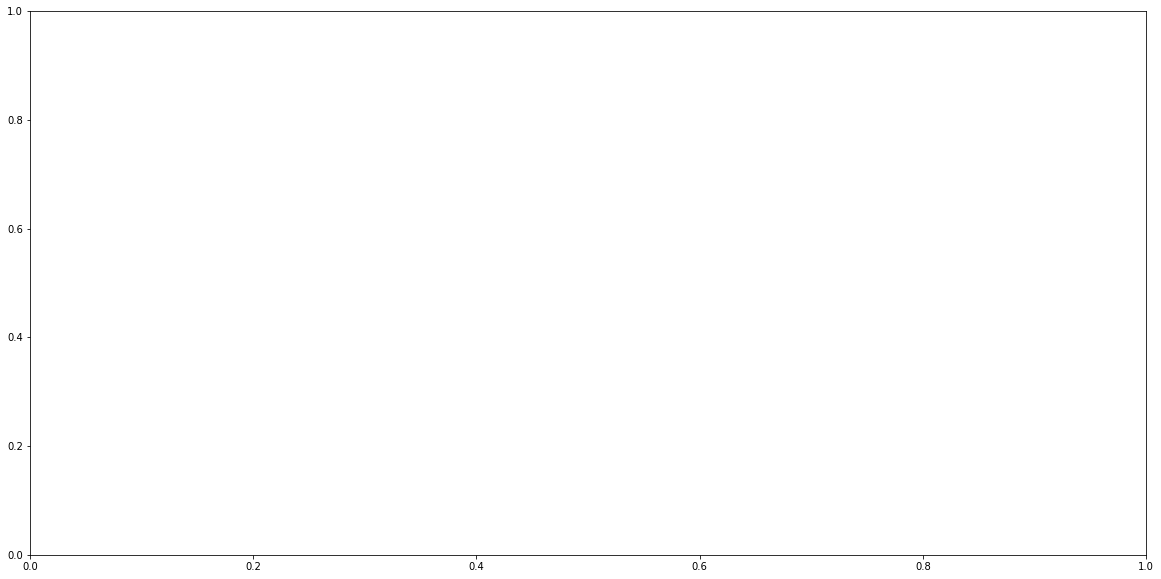

In [15]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.scatterplot(x= 'post_id',y = 'thread_id',hue="type", data = sorted_result, color = 'b',ax=ax)
plt.xticks(rotation=90, horizontalalignment="center") 
plt.title("Total number of messages (logscale) by user type", size=16) 
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Number of Threads", size=14)

# Graph 5

In [ ]:
posts_threads = pd.merge(course_threads, course_posts, on=['thread_id'])
posts_threads[:5]

In [64]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(course_information[['weeks']])
course_information['weeks'] = pd.DataFrame(x_scaled)
ranges = np.arange(0.0, 1.5, 0.15)
course_information["weeks"] = pd.cut(course_information['weeks'], ranges)


In [65]:
course_information.columns

Index(['name', 'course_id', 'weeks', 'hours', 'start_date', 'end_date', 'type',
       'language', 'num_threads', 'mandatory_posts', 'num_users'],
      dtype='object')

In [66]:
posts_threads.columns

Index(['thread_id', 'course_id_x', 'og_forum', 'og_forum_id', 'parent_forum',
       'parent_forum_id', 'forum_chain', 'depth', 'num_views', 'num_tags',
       'forum_id_x', 'post_id', 'course_id_y', 'parent_id', 'order', 'user_id',
       'user_type', 'post_time', 'relative_t', 'votes', 'num_words',
       'forum_id_y'],
      dtype='object')

In [ ]:
all_combined = pd.merge(course_information[['course_id','weeks','type']], posts_threads[['thread_id','course_id_x','forum_id_x','forum_id_y','course_id_y','post_id']], left_on ='course_id', right_on ='course_id_x')
all_combined[:5]

In [28]:
all_combined.columns

Index(['course_id', 'weeks', 'type', 'thread_id', 'course_id_x', 'forum_id_x',
       'forum_id_y', 'course_id_y', 'post_id'],
      dtype='object')

In [29]:
#all_combined["weeks"] = all_combined["weeks"].apply(lambda x: x.right)

In [32]:
all_combined = all_combined.loc[(all_combined['forum_id_x'] == 2) |(all_combined['forum_id_x'] == 3)
                                |(all_combined['forum_id_x'] == 4)|(all_combined['forum_id_x'] == 7)
                                |(all_combined['forum_id_x'] == 8)|(all_combined['forum_id_x'] == 9)
                                |(all_combined['forum_id_x'] == 100)]

In [34]:
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(2, 'General (Miscellaneous) Discussion')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(3, 'Assignments')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(4, 'Study Groups / Meetups')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(7, 'Course Feedback / Suggestions')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(8, 'Lectures')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(9, 'Platform Issues')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(100, 'Signature Track')

In [35]:
all_combined['forum_id_x'].unique()

array(['Course Feedback / Suggestions',
       'General (Miscellaneous) Discussion', 'Lectures', 'Assignments',
       'Study Groups / Meetups', 'Platform Issues', 'Signature Track'],
      dtype=object)

In [48]:
all_combined_quantitative = all_combined.loc[(all_combined['type'] == 'Q')]
all_combined_quantitative = all_combined_quantitative.groupby(["forum_id_x", "weeks"]).size().reset_index()
all_combined_quantitative["weeks"] = all_combined_quantitative["weeks"].apply(lambda x: x.right)
all_combined_quantitative[:5]

,forum_id_x,weeks,0
0,Assignments,0.15,224030
1,Assignments,0.30,1556209
2,Assignments,0.45,862825
3,Assignments,0.60,790672
4,Assignments,0.75,83084
5,Course Feedback / Suggestions,0.15,98488
6,Course Feedback / Suggestions,0.30,298178
7,Course Feedback / Suggestions,0.45,296383
8,Course Feedback / Suggestions,0.60,55883
9,Course Feedback / Suggestions,0.75,6363


In [43]:
all_combined_non_quantitative = all_combined.loc[(all_combined['type'] != 'Q') & (all_combined['type'] != '?')]
all_combined_non_quantitative = all_combined_non_quantitative.groupby(["forum_id_x", "weeks"]).size().reset_index()
all_combined_non_quantitative["weeks"] = all_combined_non_quantitative["weeks"].apply(lambda x: x.right)
all_combined_non_quantitative[:5]

,forum_id_x,weeks,0
0,Assignments,0.15,736893
1,Assignments,0.30,182545
2,Assignments,0.45,67503
3,Assignments,0.60,133312
4,Assignments,1.05,11748
5,Course Feedback / Suggestions,0.15,61885
6,Course Feedback / Suggestions,0.30,89558
7,Course Feedback / Suggestions,0.45,30577
8,Course Feedback / Suggestions,0.60,50098
9,Course Feedback / Suggestions,1.05,39359


Text(0.5, 0, 'Normalized course duration')

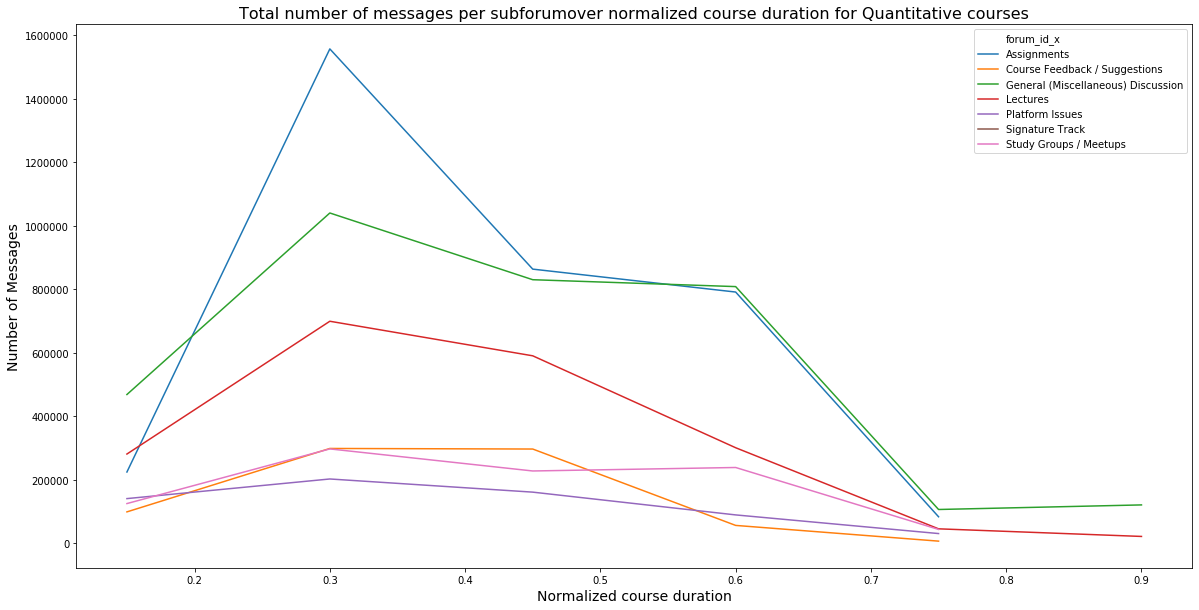

In [47]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.lineplot(x= 'weeks',y = 0,hue = "forum_id_x",markers=True, data = all_combined_quantitative, ax=ax, dashes=False)
plt.title("Total number of messages per subforumover normalized course duration for Quantitative courses", size =16)
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Normalized course duration", size=14)

Text(0.5, 0, 'Normalized course duration')

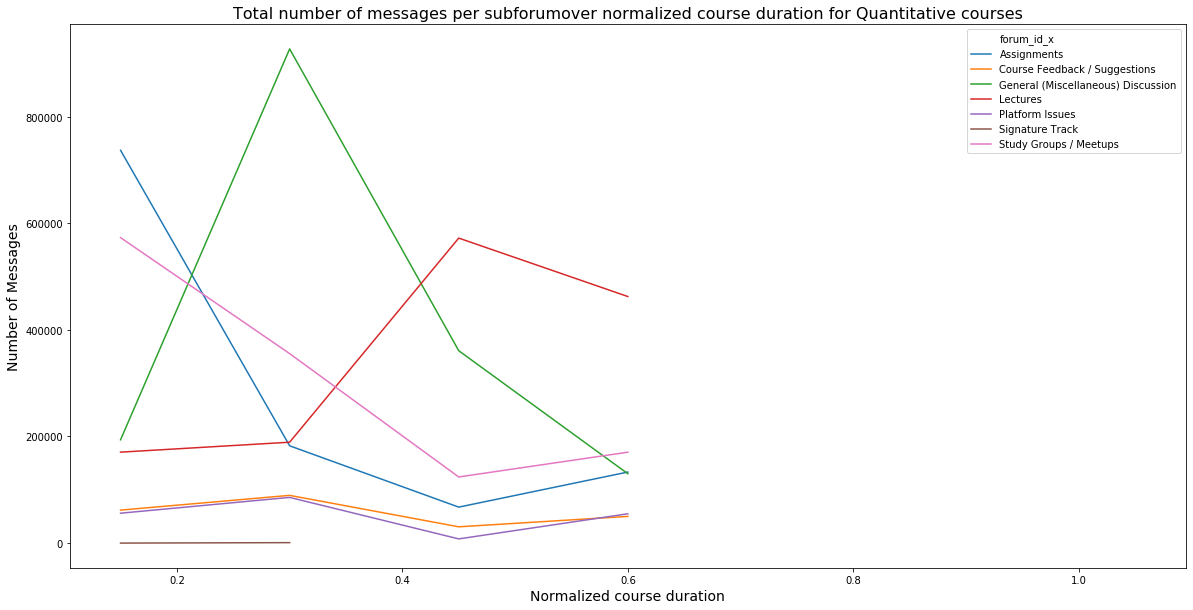

In [49]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.lineplot(x= 'weeks',y = 0,hue = "forum_id_x",markers=True, data = all_combined_non_quantitative, ax=ax, dashes=False)
plt.title("Total number of messages per subforumover normalized course duration for Quantitative courses", size =16)
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Normalized course duration", size=14)

# Graph 6

In [126]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#x = info_posts['weeks'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(info_posts[['weeks']])
info_posts['weeks'] = pd.DataFrame(x_scaled)

In [195]:


info_posts_sorted = info_posts.loc[(info_posts['user_type'] == 'Anonymous') | (info_posts['user_type'] == 'Student')]
ranges = np.arange(0.0, 1.5, 0.15)
info_posts_sorted["weeks"] = pd.cut(info_posts_sorted['weeks'], ranges)
info_posts_sorted = info_posts_sorted.groupby(["user_type", "weeks"]).size().reset_index()
info_posts_sorted["weeks"] = info_posts_sorted["weeks"].apply(lambda x: x.right)
info_posts_sorted[:5]

C:\Users\abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,user_type,weeks,0
0,Anonymous,0.15,14837
1,Anonymous,0.30,25578
2,Anonymous,0.45,11650
3,Anonymous,0.60,10405
4,Anonymous,0.75,192
5,Anonymous,0.90,246
6,Anonymous,1.05,5700
7,Student,0.15,164509
8,Student,0.30,180046
9,Student,0.45,126150


C:\Users\abhis\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
C:\Users\abhis\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\abhis\Anaconda3\lib\site-packages\seaborn\algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
C:\Users\abhis\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, 'Normalized course duration')

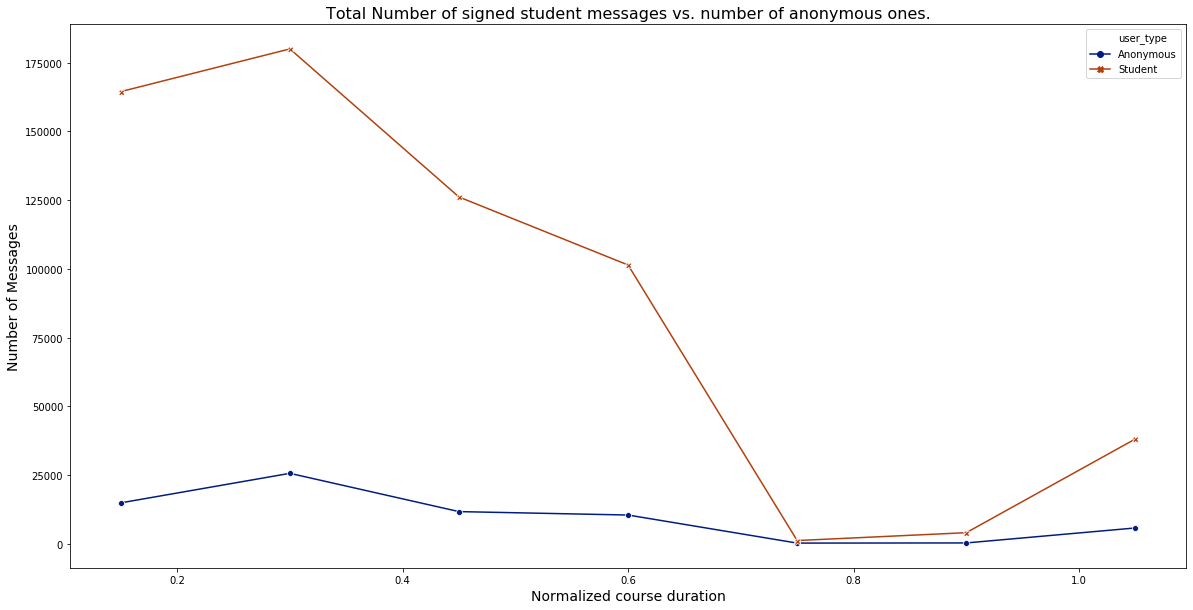

In [196]:
fig, ax = plt.subplots(figsize=(20, 10)) 
palette = sns.color_palette("dark",2)
sns.lineplot(x= 'weeks',y = 0, style="user_type",hue = "user_type",markers=True, data = info_posts_sorted, ax=ax, dashes=False, palette=palette)
plt.title("Total Number of signed student messages vs. number of anonymous ones.", size =16)
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Normalized course duration", size=14)